In [26]:
from EM import *
T=20
r=np.load("./r.npy")
EM_model=EM(T, -2, 0.2, 6.0, 2, 0.4, 0.1, 0., 2.5,rfilename="./r.npy")
EM_model=torch.load("./EM_model.pt")

In [27]:
#params=(0.2, 0.2, 6.0, 1, 0.4, 0.1, 0.02, 2.5)
params=(EM_model.alpha_r.item(), EM_model.beta_r.item(), EM_model.d.item(), EM_model.alpha_u.item(), EM_model.beta_u.item(), EM_model.gamma.item(), EM_model.theta.item(), EM_model._lambda.item())
print(params)


(0.2, 0.2, 6.0, 0.8524475963179889, 0.1890001721958615, 0.1, -0.03411959545855468, 2.5)


In [35]:

#alpha_r, beta_r, d, alpha_u, beta_u, self.gamma, theta, self._lambda
sampler=TEST_SAMPLER(T,params)
samples,weights=sampler.sample(100000,r,exp_scale=0.5)
print(sampler.ESS_list)
#print(r.shape,samples.shape,weights.shape)
index = np.random.choice(list(range(len(weights))), p=weights, size=(len(weights)))
samples=samples[index]
timelist=[t for t in range(1,T+1)]
r_truth=np.load("./r_truth.npy")[:T]
eps_truth=np.load("./eps_truth.npy")[:T]
eps_mean=samples.mean(axis=0)
eps_std=np.std(samples,axis=0)
scale=1.96


[21118.9861289657, 11042.25939242907, 10522.291511815401, 8067.6936887491165, 40103.227720717696, 13212.373771553499, 6979.794725565736, 82657.84688426474, 68293.23093158404, 2478.4311252183124, 36690.32143128667, 31364.444942697148, 20902.497289066818, 10596.196518431076, 1273.846348150634, 53573.15857759424, 34158.615217690414, 28576.95029711993, 18875.3322615461, 12197.49429658881]


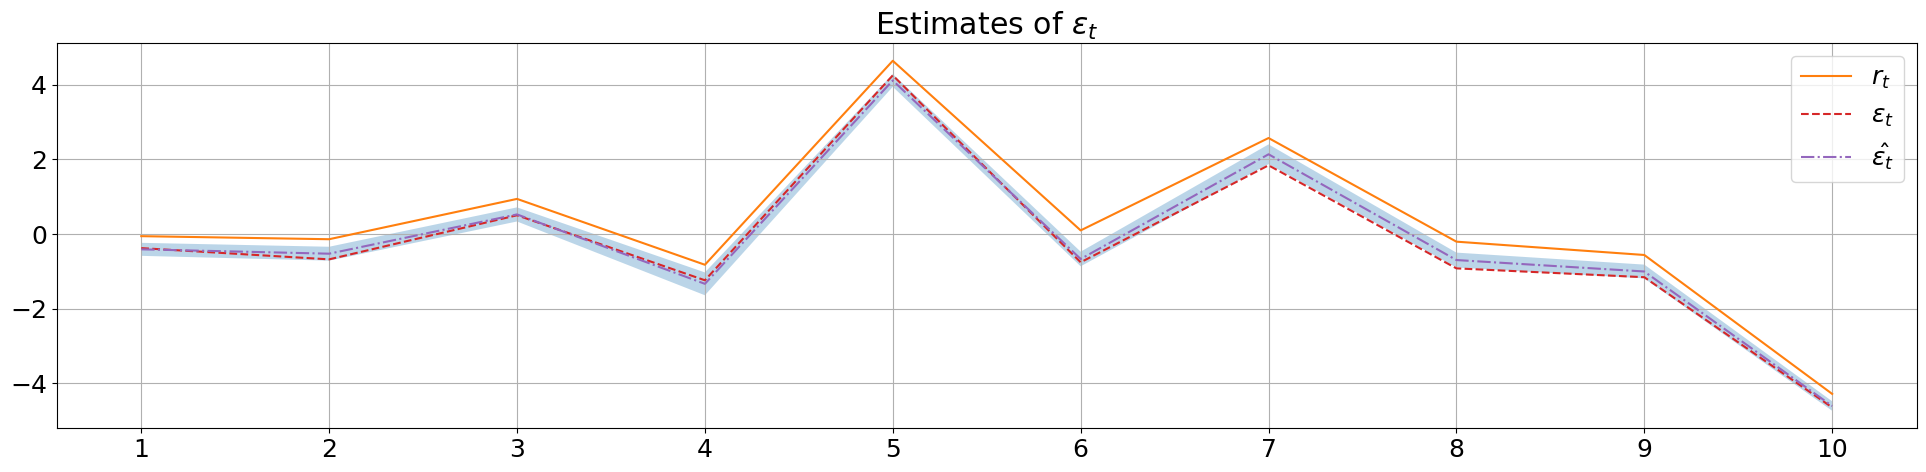

In [44]:
plt.figure(figsize=(24,5))
plt.plot(timelist[:10],r_truth[:10],label="$r_t$",ls='-',c="C1")
plt.plot(timelist[:10],eps_truth[:10],label=r"$\epsilon_t$",ls='--',c="C3")
plt.plot(timelist[:10],eps_mean[:10],label=r"$\hat{\epsilon_t}$",ls='-.',c="C4")
plt.fill_between(timelist[:10],eps_mean[:10]-scale*eps_std[:10],eps_mean[:10]+scale*eps_std[:10],alpha=0.3)
plt.grid()
x_ticks=[1,2,3,4,5,6,7,8,9,10]
plt.xticks(x_ticks)
plt.rcParams.update({'font.size':18})
plt.legend()
plt.title("Estimates of "+r"$\epsilon_t$")
plt.savefig("eps_1.pdf")


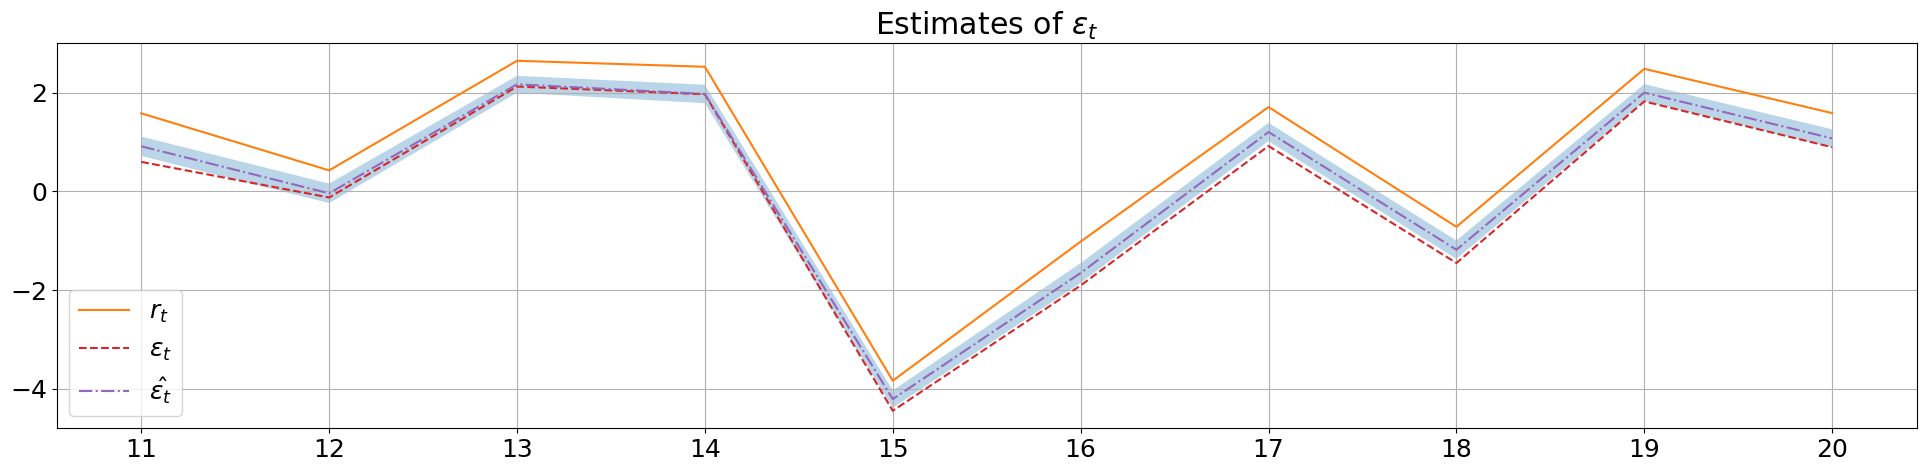

In [43]:
plt.figure(figsize=(24,5))
plt.plot(timelist[10:],r_truth[10:],label="$r_t$",ls='-',c="C1")
plt.plot(timelist[10:],eps_truth[10:],label=r"$\epsilon_t$",ls='--',c="C3")
plt.plot(timelist[10:],eps_mean[10:],label=r"$\hat{\epsilon_t}$",ls='-.',c="C4")
plt.fill_between(timelist[10:],eps_mean[10:]-scale*eps_std[10:],eps_mean[10:]+scale*eps_std[10:],alpha=0.3)
plt.grid()
x_ticks=[11,12,13,14,15,16,17,18,19,20]
plt.xticks(x_ticks)
plt.rcParams.update({'font.size':18})
plt.legend()
plt.title("Estimates of "+r"$\epsilon_t$")
plt.savefig("eps_2.pdf")


In [33]:
#params=(0.2, 0.2, 6.0, 1, 0.4, 0.1, 0.02, 2.5)
alpha_r, beta_r, d, alpha_u, beta_u,gamma, theta, _lambda = params
n=100
T=20
r_predict=np.zeros((T+5,n)) #r yield
r_predict[:T]=r
eps_list=np.zeros((T+5,n))
eps_list[:T]=eps_mean.reshape(-1,1)
u_list=np.zeros((T+5,n))
eps=np.ones(n)*eps_mean[-1]
u=eps**2/6

for i in range(T,T+5):
    u = alpha_u+beta_u*u+gamma*(eps**2)+theta*np.where(eps<0,eps**2,0)+norm.rvs(scale=0.5,size=n)
    u=np.where(u>0,u,0)
    print("min u",u.min())
    eps=np.random.standard_t(df=d, size=n)*np.sqrt(u)
    u_list[i]=u
    eps_list[i]=eps
    r_predict[i]=alpha_r+beta_r*u+eps
r_predict=r_predict.T

min u 0.0
min u 0.0
min u 0.0
min u 0.22056162891248565
min u 0.0


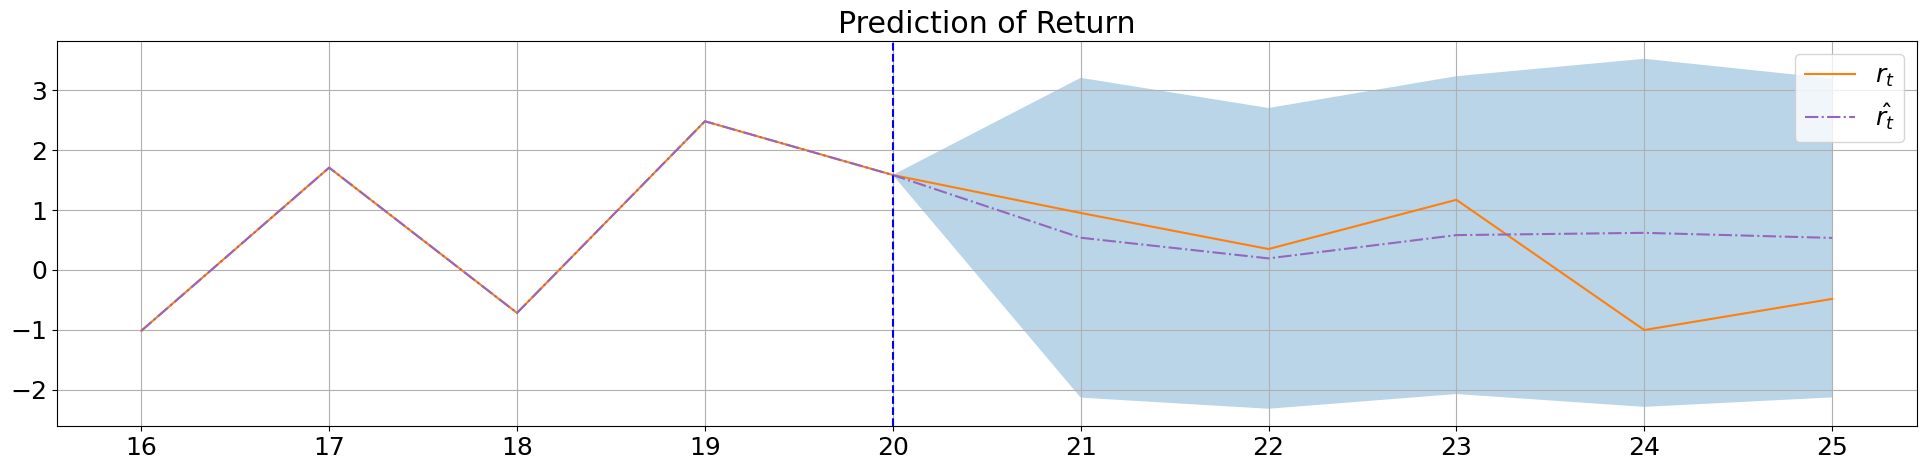

In [49]:
r_truth=np.load("./r_truth.npy")
eps_truth=np.load("./eps_truth.npy")
timelist=[t for t in range(1,T+6)]
r_mean=r_predict.mean(axis=0)
r_std=np.std(r_predict,axis=0)
scale=1.96
plt.figure(figsize=(24,5))
plt.plot(timelist[15:],r_truth[15:],label="$r_t$",ls='-',c="C1")
# plt.plot(timelist,eps_truth,label=r"$\epsilon_t$",ls='--',c="C3")
plt.plot(timelist[15:],r_mean[15:],label=r"$\hat{r_t}$",ls='-.',c="C4")
plt.fill_between(timelist[15:],r_mean[15:]-scale*r_std[15:],r_mean[15:]+scale*r_std[15:],alpha=0.3)
plt.axvline(x=20,ls="--",c="blue")
plt.grid()
x_ticks=[16,17,18,19,20,21,22,23,24,25]
plt.xticks(x_ticks)
plt.legend()
plt.title("Prediction of Return")
plt.savefig("prediction_1.pdf")